<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/PPGOLD_logo.png" width="300" alt="PPGOLD Data Science: INTRO"  />
</p>

# Aula 06-1 de Data Science

## Árvores de Decisão Básico (Decision Trees Basics)

* **Case de distribuição de e-commerce**
* Tempo estimado: **40** minutos

# Objetivos

Após completar esta aula, você será capaz de:

* Obter os dados do case
* Realizar um pré processamento nos dados
* Realizar uma classificação supervisionada através de `Árvores de Decisão`

# Bibliotecas

In [48]:
# Comando para verificar a versão instalada do python
!python -V

# Importando a biblioteca pandas para manipulação de dados
import pandas as pd

# Iportando numpy para criar, manipular e operar em arrays multidimensionais, bem como para realizar operações matemáticas avançadas.
import numpy as np

# Importando as bibliotecas do matplotlib para gerar gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt

# Importando a bilbioteca collections para trabalhar com coleções de dados, como listas, tuplas, conjuntos e dicionários.
import collections

# Importando a bliblioteca random para geração de números aleatórios
import random 

# Importando biblioteca do seaborn para gerar gráficos mais atraentes e informativos
import seaborn as sns

# import decision trees scikit-learn libraries
%matplotlib inline
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix # Não usaremos essas métricas neste exemplo

import matplotlib.pyplot as plt

#!conda install python-graphviz --yes
#!pip install python-graphviz --yes
#https://graphviz.org/download/
import graphviz

from sklearn.tree import export_graphviz
from sklearn.preprocessing import OneHotEncoder

import itertools

# Usado para exibir os gráficos gerados pela biblioteca Matplotlib diretamente no notebook, sem precisar abrir uma janela externa.
%matplotlib inline

Python 3.9.7


# Obtendo Dados

* Inclua um CSV com os dados a serem analisados
    * Incluindo cabeçalho
    * Separação de campos delimitado por *,*
    * Separação de linha usando *nova linha*

 * O arquivo tem mais de 6000 registros, pode levar alguns segundos.

In [49]:
# Caminhbo do arquivo
file_path = "https://raw.githubusercontent.com/EduPek/PPGOLD7037/main/Data/Distribution_12k.csv"

# Lendo o arquivo
starsData = pd.read_csv(file_path)

# Visualizando s primeiras linhas
starsData.head()

,Stars,Product,Origin,CD_name,Dest,DistanceTravelled_Fac_CD,TruckType,DriverF_CD,DaysStocked,FloorCD,DistanceTravelled_CD_Client,TruckType2,DriverCD_C,RoutDeliveryOrder
0,4.0,P6,F4,CD2,C203,162,SemiTrailler,D05,37,2,59.7,CityDeliveryTruck,D2_2,2
1,1.0,P2,F3,CD2,C202,162,SemiTrailler,D06,5,0,94.2,MiniVan,D2_4,3
2,5.0,P6,F3,CD2,C202,162,SemiTrailler,D04,27,0,30.9,Van,D2_7,1
3,2.0,P9,F3,CD2,C202,162,SemiTrailler,D03,14,0,89.7,Van,D2_7,3
4,5.0,P9,F2,CD3,C305,58,Truck,D03,30,1,171.7,Van,D3_2,6


# Pré-Processamento dos Dados

## Renomear a primeira coluna para "stars"

Para se adequar ao código

In [50]:
# Obtendo o nome das colunas
column_names = starsData.columns.values

# Printando o nome
print(starsData.columns.values)

# Alterando a primeira posição da lista para 'stars'
column_names[0] = "stars"

# Passando o novo nome para  o dataframe
starsData.columns = column_names

# Printando o nome
print(column_names)


['Stars' 'Product' 'Origin' 'CD_name' 'Dest' 'DistanceTravelled_Fac_CD'
 'TruckType' 'DriverF_CD' 'DaysStocked' 'FloorCD'
 'DistanceTravelled_CD_Client' 'TruckType2' 'DriverCD_C'
 'RoutDeliveryOrder']
['stars' 'Product' 'Origin' 'CD_name' 'Dest' 'DistanceTravelled_Fac_CD'
 'TruckType' 'DriverF_CD' 'DaysStocked' 'FloorCD'
 'DistanceTravelled_CD_Client' 'TruckType2' 'DriverCD_C'
 'RoutDeliveryOrder']


## Valores Ausentes

* Em um contexto real, deveríamos verificar cada coluna minuciosamente procurando por valores fora dos padrões. Mas aqui vamos "verificar" somente a coluna "stars"

* **Exemplos mais comuns de valores fora dos padrões são:**
    * Valores numéricos fora do intervalo, por exemplo quantidades de estrelas igual a 15, quando devia ser de 1 a 5.
    * Texto no local de valores numéricos
    * Valores "nan" Not a Number
    * Para valores de categorias, no nosso exemplo os produtos são P1, P2, P3; Caso apareca um "Produto 1" precisa ser uniformizado

In [51]:
starsData.shape

(12374, 14)

<AxesSubplot: >

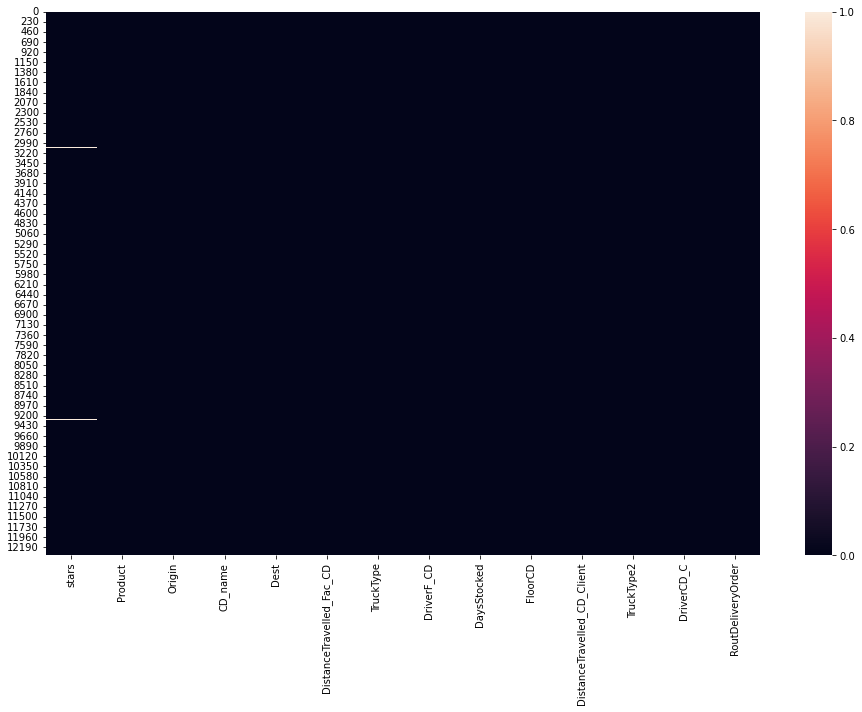

In [52]:
plt.figure(figsize=(16,10))
sns.heatmap(starsData.isnull())

In [53]:
starsData.isnull().sum()

stars                          42
Product                         0
Origin                          0
CD_name                         0
Dest                            0
DistanceTravelled_Fac_CD        0
TruckType                       0
DriverF_CD                      0
DaysStocked                     0
FloorCD                         0
DistanceTravelled_CD_Client     0
TruckType2                      0
DriverCD_C                      0
RoutDeliveryOrder               0
dtype: int64

In [54]:
dfStarsFrequency = starsData["stars"].value_counts().to_frame()
dfStarsFrequency.sort_index(inplace= True)
dfStarsFrequency.head(10)

,stars
1.0,2303
2.0,2383
3.0,2769
4.0,2469
5.0,2357
6.0,48
7.0,1
9.0,1
11.0,1


<AxesSubplot: title={'center': 'Stars Frequency'}, xlabel='Stars', ylabel='Frequency'>

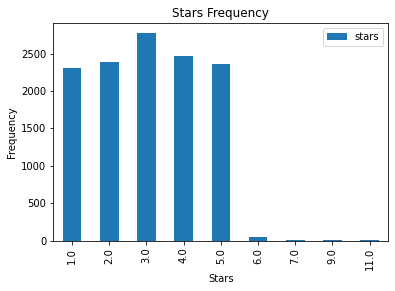

In [55]:
dfStarsFrequency.plot(kind='bar'
                        ,title="Stars Frequency"
                        ,xlabel='Stars'
                        ,ylabel='Frequency')


* **Existem dados fora do intervalo de estrelas [1,5] , alguns valores são 6 outros são NAN**
* Limpar dados de estrelas fora do intervalo [1,5], excluindo os registros

In [56]:
starsData = starsData[starsData["stars"] <= 5]
starsData = starsData[starsData["stars"] >= 1]

starsData = starsData[starsData["FloorCD"] <= 4] 
starsData = starsData[starsData["FloorCD"] >= 0]

starsData = starsData[starsData["RoutDeliveryOrder"] <= 6]
starsData = starsData[starsData["RoutDeliveryOrder"] >= 1]

# É importante refazer o indice do dataFrame, após excluir linhas, pois pode gerar problema no SciKit Learn
starsData = starsData.reset_index(drop=True) 
print("Novo shape = ",starsData.shape)

Novo shape =  (12281, 14)


<AxesSubplot: title={'center': 'Stars Frequency'}, xlabel='Stars', ylabel='Frequency'>

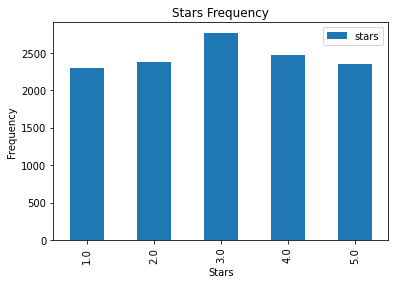

In [57]:
dfStarsFrequency = starsData["stars"].value_counts().to_frame()
dfStarsFrequency.sort_index(inplace= True)
dfStarsFrequency.head(10)

dfStarsFrequency.plot(kind='bar'
                        ,title="Stars Frequency"
                        ,xlabel='Stars'
                        ,ylabel='Frequency')

## Outras Inconsistências entre as Colunas 'DriverF_CD' & 'CD_name'

In [58]:
dfCD = starsData[['DriverF_CD','CD_name']]

In [59]:
dfCD.head(10)

,DriverF_CD,CD_name
0,D05,CD2
1,D06,CD2
2,D04,CD2
3,D03,CD2
4,D03,CD3
5,D01,CD2
6,D01,CD1
7,D06,CD3
8,D05,CD2
9,D05,CD1


* Note a coluna Driver_F_CD, ela só tem os valores "D01" ... "D06" mas não sabemos se o motorista D01 pode trabalhar no CD1, CD2 ou CD3 ? Isso não te parece no mínimo esquisito ?

* Fica como Lição de casa você pensar em uma alternativa


In [60]:
dfCDCrossTable = pd.crosstab(index=starsData['CD_name'], columns=starsData['DriverF_CD'])
dfCDCrossTable.index.name=None
dfCDCrossTable.columns.name=None
dfCDCrossTable

,D01,D02,D03,D04,D05,D06
CD1,632,776,704,752,684,744
CD2,588,676,620,700,620,744
CD3,689,660,624,720,648,700


Text(0, 0.5, 'Freq')

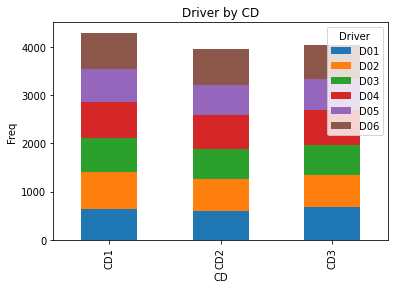

In [61]:
ax = dfCDCrossTable.plot.bar(stacked=True)
ax.legend(title='Driver')
ax.set_title('Driver by CD')
ax.set_xlabel('CD')
ax.set_ylabel('Freq')

# Árvore de Decisão

* Usaremos as bibliotecas: 
    * SKLEARN
    * graphviz
    * matplotlib

## Separar o dataFrame em variáveis dependentes e independentes

In [62]:
# split the DataFrame
# Só a coluna "stars"
dependentVariableStars = starsData["stars"].copy(deep=True) 
dependentVariableStars.head()

0    4.0
1    1.0
2    5.0
3    2.0
4    5.0
Name: stars, dtype: float64

In [63]:
# Todas as outras colunas com excessão da "stars"
independetVariables = starsData.drop(columns=['stars']).copy(deep=True)
independetVariables.head()

,Product,Origin,CD_name,Dest,DistanceTravelled_Fac_CD,TruckType,DriverF_CD,DaysStocked,FloorCD,DistanceTravelled_CD_Client,TruckType2,DriverCD_C,RoutDeliveryOrder
0,P6,F4,CD2,C203,162,SemiTrailler,D05,37,2,59.7,CityDeliveryTruck,D2_2,2
1,P2,F3,CD2,C202,162,SemiTrailler,D06,5,0,94.2,MiniVan,D2_4,3
2,P6,F3,CD2,C202,162,SemiTrailler,D04,27,0,30.9,Van,D2_7,1
3,P9,F3,CD2,C202,162,SemiTrailler,D03,14,0,89.7,Van,D2_7,3
4,P9,F2,CD3,C305,58,Truck,D03,30,1,171.7,Van,D3_2,6


## Adequação das variáveis categóricas em colunas binárias - OneHotEncoder




In [64]:
enc = OneHotEncoder(handle_unknown='ignore', sparse= False)

prod_encoded = pd.DataFrame (enc.fit_transform(independetVariables[['Product']])).astype(int)
prod_encoded.columns = enc.get_feature_names_out(['Product'])

origin_encoded = pd.DataFrame (enc.fit_transform(independetVariables[['Origin']])).astype(int)
origin_encoded.columns = enc.get_feature_names_out(['Origin'])

CD_encoded = pd.DataFrame (enc.fit_transform(independetVariables[['CD_name']])).astype(int)
CD_encoded.columns = enc.get_feature_names_out(['CD_name'])

Destination_encoded = pd.DataFrame (enc.fit_transform(independetVariables[['Dest']])).astype(int)
Destination_encoded.columns = enc.get_feature_names_out(['Dest'])

TruckType_encoded = pd.DataFrame (enc.fit_transform(independetVariables[['TruckType']])).astype(int)
TruckType_encoded.columns = enc.get_feature_names_out(['TruckType'])

TruckType2_encoded = pd.DataFrame (enc.fit_transform(independetVariables[['TruckType2']])).astype(int)
TruckType2_encoded.columns = enc.get_feature_names_out(['TruckType2'])

DriverCD_C_encoded = pd.DataFrame (enc.fit_transform(independetVariables[['DriverCD_C']])).astype(int)
DriverCD_C_encoded.columns = enc.get_feature_names_out(['DriverCD_C'])

independetVariablesEncoded = pd.concat([prod_encoded, origin_encoded, CD_encoded, Destination_encoded, TruckType_encoded, TruckType2_encoded, DriverCD_C_encoded, independetVariables["RoutDeliveryOrder"], independetVariables["FloorCD"]], axis=1)

independetVariablesEncoded.head()

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was re

,Product_P1,Product_P10,Product_P11,Product_P12,Product_P13,Product_P14,Product_P15,Product_P2,Product_P3,Product_P4,...,DriverCD_C_D2_7,DriverCD_C_D3_1,DriverCD_C_D3_2,DriverCD_C_D3_3,DriverCD_C_D3_4,DriverCD_C_D3_5,DriverCD_C_D3_6,DriverCD_C_D3_7,RoutDeliveryOrder,FloorCD
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,3,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,3,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,6,1


## DecisionTreeClassifier e os seus Parâmetros

* O algoritimo do DecisionTreeClassifier tem a tendência natural de fazer um OVERFITING
* **Para ajustar isso modificamos os parâmetros:**
    * `max_depth` : Profundidade máxima da árvore
    * `min_samples_split` : Quantidade mínima de amostras para se dividir um nó
    * `min_samples_leaf` : Quantidade mínima de amostras em um nó folha (nó da base da árvore)

In [65]:
delivery_tree = tree.DecisionTreeClassifier(max_depth = 4, min_samples_split = 2, min_samples_leaf = 1)
delivery_tree.fit(independetVariablesEncoded, dependentVariableStars)

print("Decision tree model saved to delivery_tree!")
print(delivery_tree)
print(independetVariablesEncoded.columns.values)

Decision tree model saved to delivery_tree!
DecisionTreeClassifier(max_depth=4)
['Product_P1' 'Product_P10' 'Product_P11' 'Product_P12' 'Product_P13'
 'Product_P14' 'Product_P15' 'Product_P2' 'Product_P3' 'Product_P4'
 'Product_P5' 'Product_P6' 'Product_P7' 'Product_P8' 'Product_P9'
 'Origin_F1' 'Origin_F2' 'Origin_F3' 'Origin_F4' 'CD_name_CD1'
 'CD_name_CD2' 'CD_name_CD3' 'Dest_C101' 'Dest_C102' 'Dest_C103'
 'Dest_C104' 'Dest_C105' 'Dest_C201' 'Dest_C202' 'Dest_C203' 'Dest_C204'
 'Dest_C205' 'Dest_C301' 'Dest_C302' 'Dest_C303' 'Dest_C304' 'Dest_C305'
 'TruckType_SemiTrailler' 'TruckType_Truck' 'TruckType2_CityDeliveryTruck'
 'TruckType2_MiniVan' 'TruckType2_Van' 'DriverCD_C_D1_1' 'DriverCD_C_D1_2'
 'DriverCD_C_D1_3' 'DriverCD_C_D1_4' 'DriverCD_C_D1_5' 'DriverCD_C_D1_6'
 'DriverCD_C_D1_7' 'DriverCD_C_D2_1' 'DriverCD_C_D2_2' 'DriverCD_C_D2_3'
 'DriverCD_C_D2_4' 'DriverCD_C_D2_5' 'DriverCD_C_D2_6' 'DriverCD_C_D2_7'
 'DriverCD_C_D3_1' 'DriverCD_C_D3_2' 'DriverCD_C_D3_3' 'DriverCD_C_D3_4'


## Gráfico em árvore

In [66]:
export_graphviz(delivery_tree,
                feature_names=list(independetVariablesEncoded.columns.values),
                out_file="delivery_tree.dot",
                class_names=np.unique(dependentVariableStars.astype(str)),
                filled=True,
                rounded=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel = False)



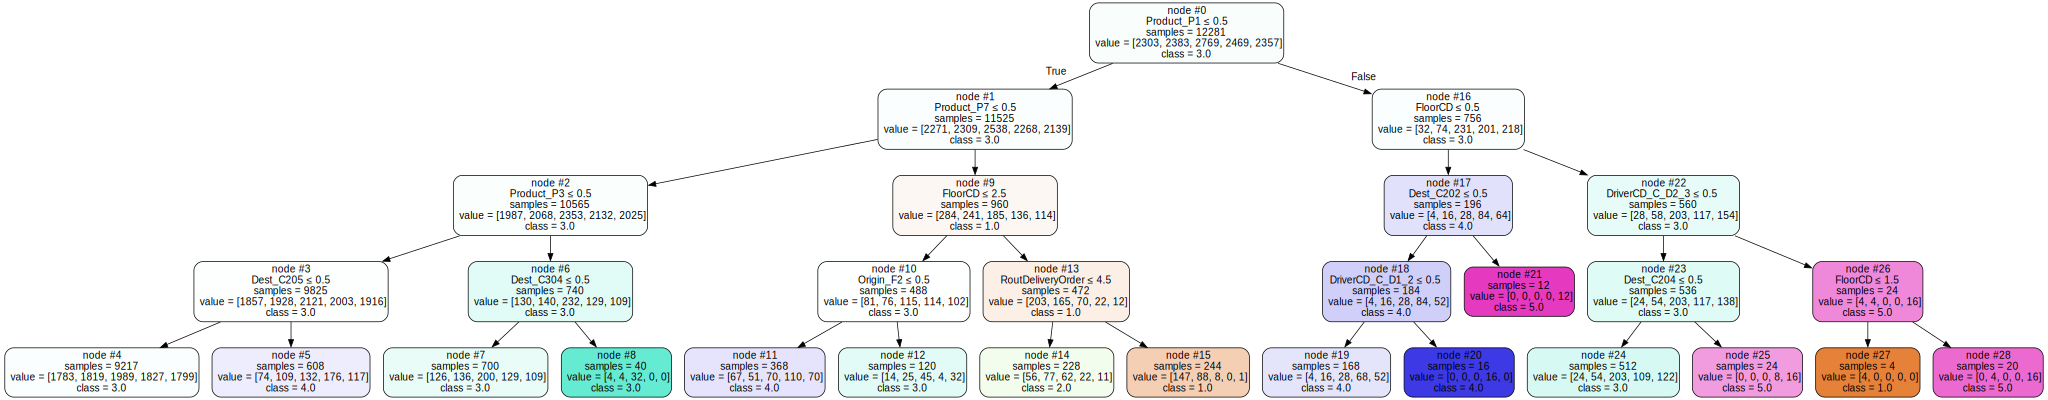

In [67]:
with open("delivery_tree.dot") as delivery_tree_image:
    delivery_tree_graph = delivery_tree_image.read()
    
graphviz.Source(delivery_tree_graph)

* **Modificar a variável dependente para (bad, average, good) ao invés de [1,5]**
* **Atenção: na saída gráfica os valores do vetor Value estarão em ordem alfabeetica, ou seja, (average, bad, good)**

In [68]:
dependentVariableStars = pd.DataFrame({'stars':dependentVariableStars})
dependentVariableStars

,stars
0,4.0
1,1.0
2,5.0
3,2.0
4,5.0
...,...
12276,5.0
12277,5.0
12278,4.0
12279,3.0


In [69]:
bad_conditions = dependentVariableStars['stars'] <= 2
average_conditions = dependentVariableStars['stars'] == 3
good_conditions = dependentVariableStars['stars'] >= 4

dependentVariableStars[bad_conditions] = "bad"
dependentVariableStars[average_conditions] = "average"
dependentVariableStars[good_conditions] = "good"
dependentVariableStars.head()

,stars
0,good
1,bad
2,good
3,bad
4,good


Decision tree model saved to delivery_tree!
DecisionTreeClassifier(max_depth=3)
['Product_P1' 'Product_P10' 'Product_P11' 'Product_P12' 'Product_P13'
 'Product_P14' 'Product_P15' 'Product_P2' 'Product_P3' 'Product_P4'
 'Product_P5' 'Product_P6' 'Product_P7' 'Product_P8' 'Product_P9'
 'Origin_F1' 'Origin_F2' 'Origin_F3' 'Origin_F4' 'CD_name_CD1'
 'CD_name_CD2' 'CD_name_CD3' 'Dest_C101' 'Dest_C102' 'Dest_C103'
 'Dest_C104' 'Dest_C105' 'Dest_C201' 'Dest_C202' 'Dest_C203' 'Dest_C204'
 'Dest_C205' 'Dest_C301' 'Dest_C302' 'Dest_C303' 'Dest_C304' 'Dest_C305'
 'TruckType_SemiTrailler' 'TruckType_Truck' 'TruckType2_CityDeliveryTruck'
 'TruckType2_MiniVan' 'TruckType2_Van' 'DriverCD_C_D1_1' 'DriverCD_C_D1_2'
 'DriverCD_C_D1_3' 'DriverCD_C_D1_4' 'DriverCD_C_D1_5' 'DriverCD_C_D1_6'
 'DriverCD_C_D1_7' 'DriverCD_C_D2_1' 'DriverCD_C_D2_2' 'DriverCD_C_D2_3'
 'DriverCD_C_D2_4' 'DriverCD_C_D2_5' 'DriverCD_C_D2_6' 'DriverCD_C_D2_7'
 'DriverCD_C_D3_1' 'DriverCD_C_D3_2' 'DriverCD_C_D3_3' 'DriverCD_C_D3_4'


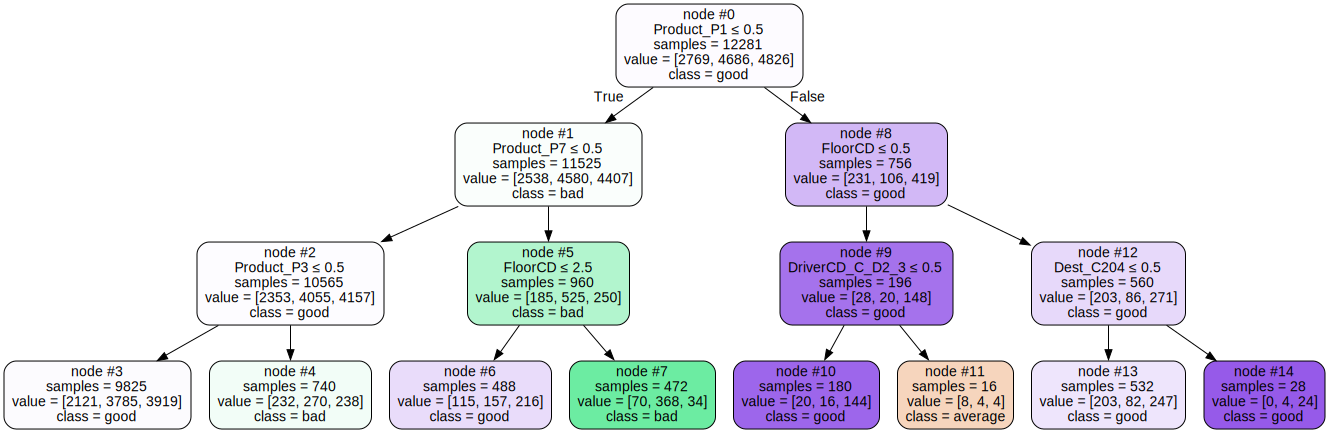

In [70]:
delivery_tree = tree.DecisionTreeClassifier(max_depth = 3, min_samples_split = 2, min_samples_leaf = 1)
delivery_tree.fit(independetVariablesEncoded, dependentVariableStars)

print("Decision tree model saved to delivery_tree!")
print(delivery_tree)
print(independetVariablesEncoded.columns.values)

export_graphviz(delivery_tree,
                feature_names=list(independetVariablesEncoded.columns.values),
                out_file="delivery_tree.dot",
                class_names=np.unique(dependentVariableStars.astype(str)),
                filled=True,
                rounded=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel = False)

with open("delivery_tree.dot") as delivery_tree_image:
    delivery_tree_graph = delivery_tree_image.read()
    
graphviz.Source(delivery_tree_graph)

* **Parece que o P7 é chave nesta árvore não?**
* **Vamos filtrar apenas os registros do  P7**

Decision tree model saved to delivery_tree!
DecisionTreeClassifier(max_depth=4)
['Product_P1' 'Product_P10' 'Product_P11' 'Product_P12' 'Product_P13'
 'Product_P14' 'Product_P15' 'Product_P2' 'Product_P3' 'Product_P4'
 'Product_P5' 'Product_P6' 'Product_P7' 'Product_P8' 'Product_P9'
 'Origin_F1' 'Origin_F2' 'Origin_F3' 'Origin_F4' 'CD_name_CD1'
 'CD_name_CD2' 'CD_name_CD3' 'Dest_C101' 'Dest_C102' 'Dest_C103'
 'Dest_C104' 'Dest_C105' 'Dest_C201' 'Dest_C202' 'Dest_C203' 'Dest_C204'
 'Dest_C205' 'Dest_C301' 'Dest_C302' 'Dest_C303' 'Dest_C304' 'Dest_C305'
 'TruckType_SemiTrailler' 'TruckType_Truck' 'TruckType2_CityDeliveryTruck'
 'TruckType2_MiniVan' 'TruckType2_Van' 'DriverCD_C_D1_1' 'DriverCD_C_D1_2'
 'DriverCD_C_D1_3' 'DriverCD_C_D1_4' 'DriverCD_C_D1_5' 'DriverCD_C_D1_6'
 'DriverCD_C_D1_7' 'DriverCD_C_D2_1' 'DriverCD_C_D2_2' 'DriverCD_C_D2_3'
 'DriverCD_C_D2_4' 'DriverCD_C_D2_5' 'DriverCD_C_D2_6' 'DriverCD_C_D2_7'
 'DriverCD_C_D3_1' 'DriverCD_C_D3_2' 'DriverCD_C_D3_3' 'DriverCD_C_D3_4'


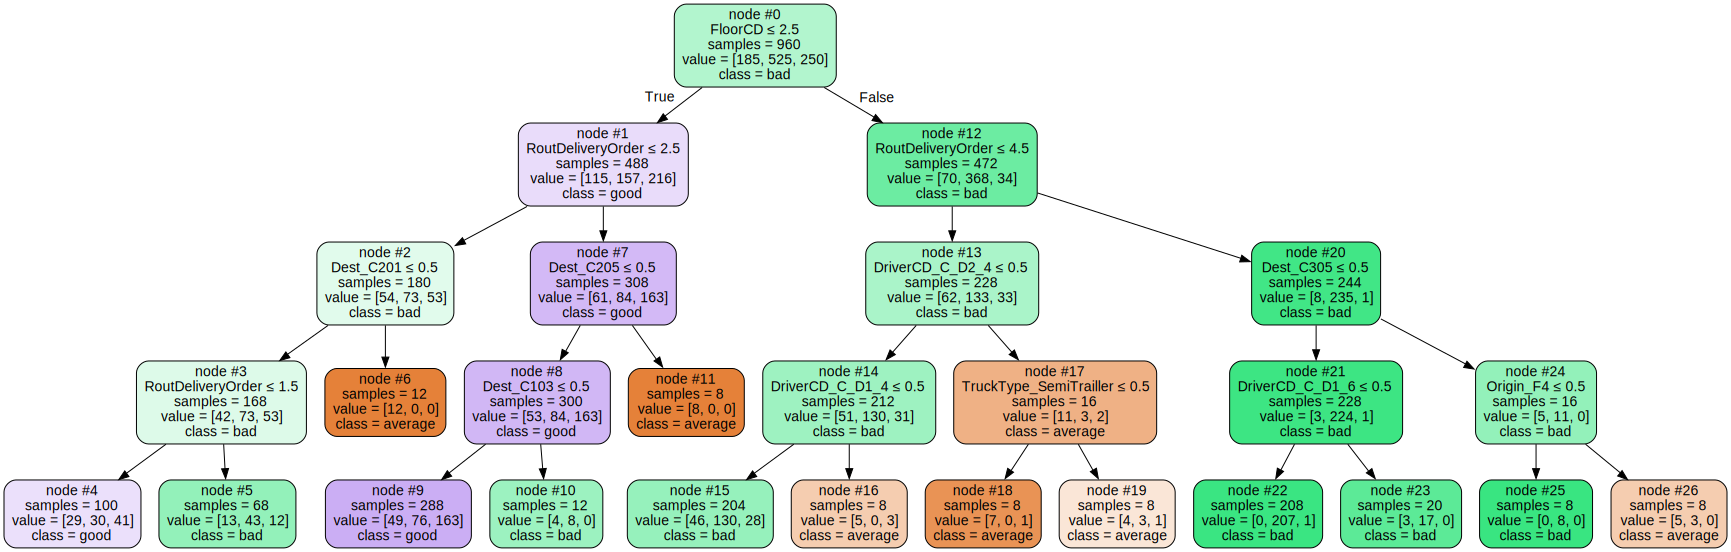

In [71]:
P7_conditions = independetVariablesEncoded["Product_P7"]==1
dependentVariableStars_p7 = dependentVariableStars[P7_conditions]
independetVariablesEncoded_p7 = independetVariablesEncoded[P7_conditions]

delivery_tree = tree.DecisionTreeClassifier(max_depth = 4, min_samples_split = 2, min_samples_leaf = 1)
delivery_tree.fit(independetVariablesEncoded_p7, dependentVariableStars_p7)

print("Decision tree model saved to delivery_tree!")
print(delivery_tree)
print(independetVariablesEncoded_p7.columns.values)

export_graphviz(delivery_tree,
                feature_names=list(independetVariablesEncoded_p7.columns.values),
                out_file="delivery_tree.dot",
                class_names=np.unique(dependentVariableStars_p7.astype(str)),
                filled=True,
                rounded=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel = False)

with open("delivery_tree.dot") as delivery_tree_image:
    delivery_tree_graph = delivery_tree_image.read()
    
graphviz.Source(delivery_tree_graph)

* **Parece que o andar ('FloorCD') onde alocamos os P07 também tem um papel importante né?**

In [72]:
p7_Floor_Conditions = independetVariablesEncoded_p7["FloorCD"]>=3

dependentVariableStars_p7_Floor = dependentVariableStars_p7[p7_Floor_Conditions]
independetVariablesEncoded_p7_Floor = independetVariablesEncoded_p7[p7_Floor_Conditions]

Decision tree model saved to delivery_tree!
DecisionTreeClassifier(max_depth=4)
['Product_P1' 'Product_P10' 'Product_P11' 'Product_P12' 'Product_P13'
 'Product_P14' 'Product_P15' 'Product_P2' 'Product_P3' 'Product_P4'
 'Product_P5' 'Product_P6' 'Product_P7' 'Product_P8' 'Product_P9'
 'Origin_F1' 'Origin_F2' 'Origin_F3' 'Origin_F4' 'CD_name_CD1'
 'CD_name_CD2' 'CD_name_CD3' 'Dest_C101' 'Dest_C102' 'Dest_C103'
 'Dest_C104' 'Dest_C105' 'Dest_C201' 'Dest_C202' 'Dest_C203' 'Dest_C204'
 'Dest_C205' 'Dest_C301' 'Dest_C302' 'Dest_C303' 'Dest_C304' 'Dest_C305'
 'TruckType_SemiTrailler' 'TruckType_Truck' 'TruckType2_CityDeliveryTruck'
 'TruckType2_MiniVan' 'TruckType2_Van' 'DriverCD_C_D1_1' 'DriverCD_C_D1_2'
 'DriverCD_C_D1_3' 'DriverCD_C_D1_4' 'DriverCD_C_D1_5' 'DriverCD_C_D1_6'
 'DriverCD_C_D1_7' 'DriverCD_C_D2_1' 'DriverCD_C_D2_2' 'DriverCD_C_D2_3'
 'DriverCD_C_D2_4' 'DriverCD_C_D2_5' 'DriverCD_C_D2_6' 'DriverCD_C_D2_7'
 'DriverCD_C_D3_1' 'DriverCD_C_D3_2' 'DriverCD_C_D3_3' 'DriverCD_C_D3_4'


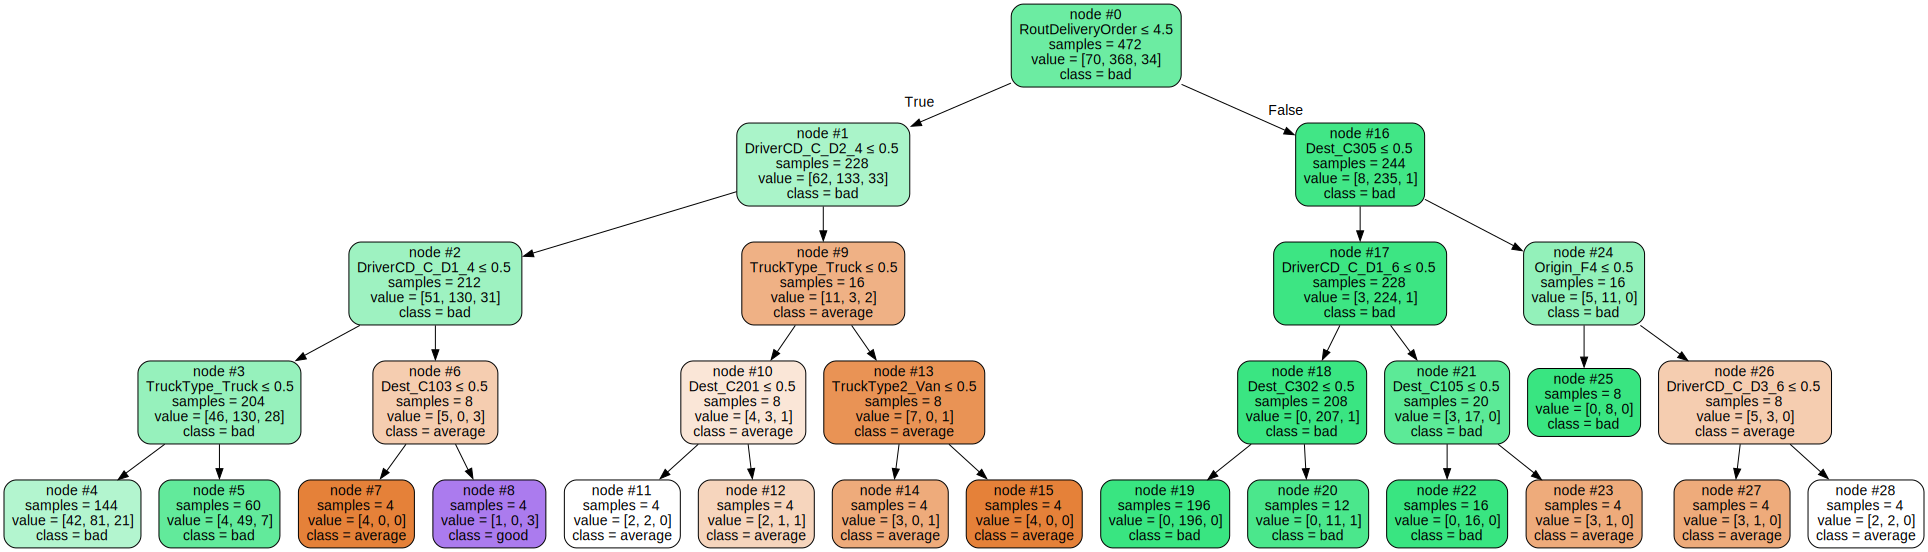

In [74]:
delivery_tree = tree.DecisionTreeClassifier(max_depth = 4, min_samples_split = 2, min_samples_leaf = 1)
delivery_tree.fit(independetVariablesEncoded_p7_Floor, dependentVariableStars_p7_Floor)

print("Decision tree model saved to delivery_tree!")
print(delivery_tree)
print(independetVariablesEncoded_p7_Floor.columns.values)

export_graphviz(delivery_tree,
                feature_names=list(independetVariablesEncoded_p7_Floor.columns.values),
                out_file="delivery_tree.dot",
                class_names=np.unique(dependentVariableStars_p7_Floor.astype(str)),
                filled=True,
                rounded=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel = False)

with open("delivery_tree.dot") as delivery_tree_image:
    delivery_tree_graph = delivery_tree_image.read()
    
graphviz.Source(delivery_tree_graph)

# Referências

## Autores

<a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pecora</a>

<a href="https://www.linkedin.com/in/hesauhugocavalcanti/" target="_blank">Hesau Hugo</a>

## Log de modificações

| Data | Versão | Modificado por | Descrição |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 04-04-2021       | 1.0     | Eduardo Pecora    | Inicial               |
| 03-11-2021       | 1.1     | Eduardo Pecora    | Estrutura Aula        |
| 17-04-2023       | 1.2     | Hesau Hugo        | Reestruturação        |
<hr>

